Accuracy: 0.7972027972027972
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82        80
           1       0.78      0.75      0.76        63

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



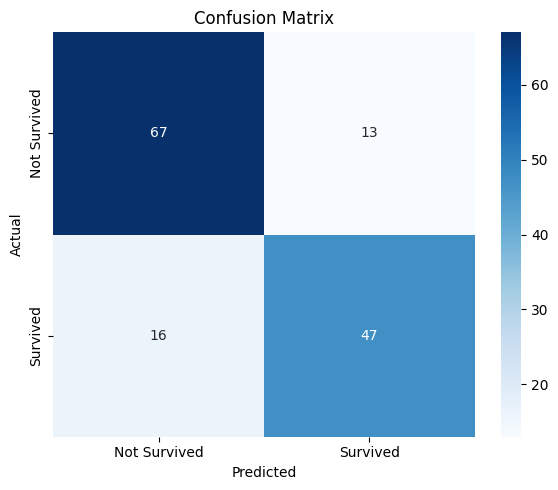

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

data = sns.load_dataset('titanic')
data = data.drop(['deck', 'embark_town', 'alive', 'class', 'who'], axis=1)
data = data.dropna()

data['family_size'] = data['sibsp'] + data['parch'] + 1
data['age_bin'] = pd.cut(data['age'], bins=[0, 12, 18, 35, 60, 100], labels=[0,1,2,3,4])
data['fare_bin'] = pd.qcut(data['fare'], q=4, labels=[0,1,2,3])

le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
model = AdaBoostClassifier(estimator=base_model, n_estimators=100, learning_rate=1.0, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()